In [1]:
import pandas as pd
import upsetplot

# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [8]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

def get_icd_dict(icd_names_file):
    icd_names = pd.read_csv(icd_names_file)
    icd_names_dict = {c.replace(" ", ""): m for c,m in zip(icd_names.coding, icd_names.meaning)}
    return icd_names_dict

In [9]:
group_names = ['I10', 'E780', 'R074', 'I251', 'I259', 'E039', 'E11', 'BlockM15-M19', 'K80', 'K81', 'F32']
upset_file = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/obesity_related_diseases/data/upset_files/protection.csv"
upset_df = pd.read_csv(upset_file).set_index(group_names)
icd_names_file = "/data5/deepro/ukbiobank/papers/bmi_project/2_prepare_data_for_analysis/obesity_related_diseases/data/tables/obesity_related_diseases_icd.csv"


In [10]:
icd_names_dict = get_icd_dict(icd_names_file)
parsed_upset_df = upset_df.loc[upset_df.counts>0]

In [17]:
parsed_upset_df.index = parsed_upset_df.index.set_names(icd_names_dict)

(0.0, 1.0, 0.0, 1.0)

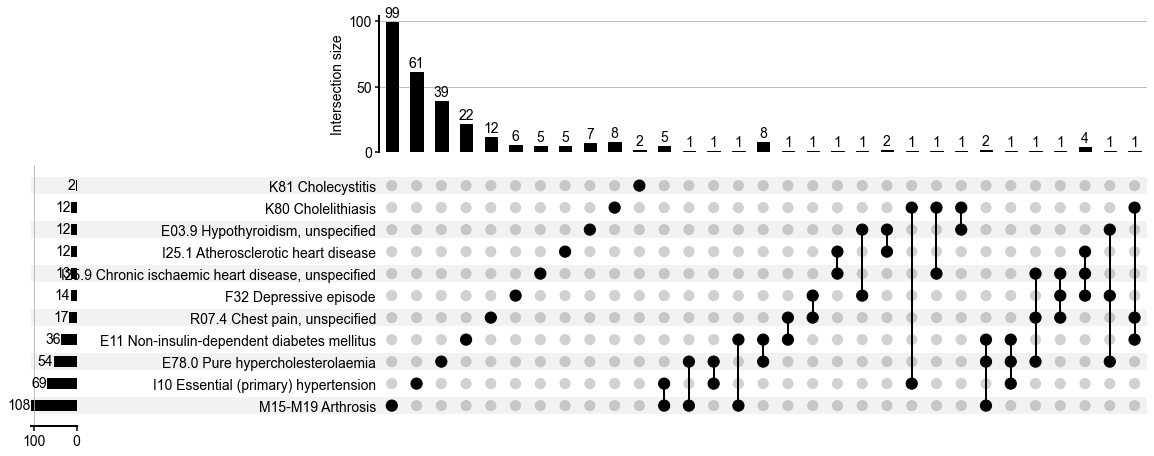

In [18]:
fig,ax = plt.subplots(1,1)
upsetplot.plot(parsed_upset_df.counts, show_counts=True, fig=fig)
ax.axis("off")

In [6]:
save_file = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/obesity_related_diseases/data/upset_files/protection_combo_overlap.pdf"
save_pdf(save_file, fig)